## Import

In [1]:
# Matplotlib
import matplotlib.pyplot as plt
# Tensorflow
import tensorflow as tf
# Numpy and Pandas
import numpy as np
import pandas as pd
# Ohter import
import sys
from sklearn.preprocessing import StandardScaler

## Be sure to used Tensorflow 2.0

In [ ]:
assert hasattr(tf, "function") # Be sure to use tensorflow 2.0

## Load the dataset: Fashion MNIST

![](https://storage.googleapis.com/kaggle-datasets-images/2243/3791/9384af51de8baa77f6320901f53bd26b/dataset-cover.png)

In [2]:
# Fashio MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(images, targets), (images_test, targets_test) = fashion_mnist.load_data()

# Get only a subpart of the dataset
images = images[:10000]
targets = targets [:10000]

# Reshape the dataset and convert to float
images = images.reshape(-1, 784)
images = images.astype(float)
images_test = images_test.reshape(-1, 784)
images_test = images_test.astype(float)

scaler = StandardScaler()
images = scaler.fit_transform(images)
images_test = scaler.transform(images_test)

print(images.shape)
print(targets.shape)

(10000, 784)
(10000,)


## Plot one of the data

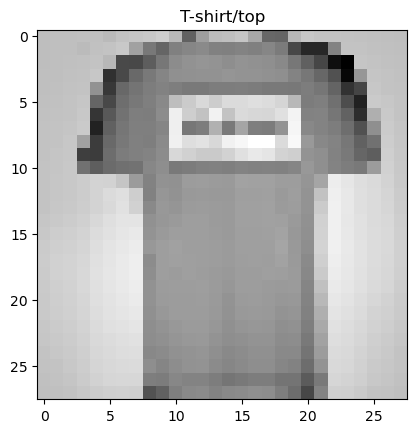

In [4]:
targets_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", 
                 "Shirt", "Sneaker", "Bag", "Ankle boot"]
# Plot one image
plt.imshow(np.reshape(images[1], (28, 28)), cmap="binary")
plt.title(targets_names[targets[1]])
plt.show()

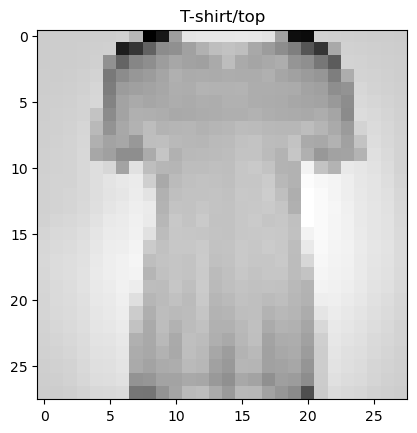

In [6]:
plt.imshow(np.reshape(images[10], (28, 28)), cmap="binary")
plt.title(targets_names[targets[10]])
plt.show()

# Create the model

In [7]:
# Flatten
model = tf.keras.models.Sequential()

# Add the layers
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [8]:
model_output = model.predict(images[0:1])
print(model_output, targets[0:1])

1/1 [==============================] - 0s 441ms/step
[[0.01133765 0.11888847 0.02650676 0.01309868 0.58798146 0.01259523
  0.04734539 0.03134103 0.05849361 0.09241177]] [9]


## Model Summary

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


## Compile the model

In [10]:
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

## Train the model

In [11]:
history = model.fit(images, targets, epochs=10, validation_split=0.2)

Epoch 1/10
250/250 [==============================] - 2s 7ms/step - loss: 0.8770 - accuracy: 0.7080 - val_loss: 0.6115 - val_accuracy: 0.7895
Epoch 2/10
250/250 [==============================] - 1s 5ms/step - loss: 0.5210 - accuracy: 0.8152 - val_loss: 0.5324 - val_accuracy: 0.8030
Epoch 3/10
250/250 [==============================] - 1s 5ms/step - loss: 0.4424 - accuracy: 0.8453 - val_loss: 0.4776 - val_accuracy: 0.8305
Epoch 4/10
250/250 [==============================] - 1s 5ms/step - loss: 0.3970 - accuracy: 0.8625 - val_loss: 0.4578 - val_accuracy: 0.8345
Epoch 5/10
250/250 [==============================] - 1s 5ms/step - loss: 0.3635 - accuracy: 0.8751 - val_loss: 0.4402 - val_accuracy: 0.8415
Epoch 6/10
250/250 [==============================] - 1s 5ms/step - loss: 0.3353 - accuracy: 0.8864 - val_loss: 0.4346 - val_accuracy: 0.8455
Epoch 7/10
250/250 [==============================] - 1s 5ms/step - loss: 0.3159 - accuracy: 0.8909 - val_loss: 0.4293 - val_accuracy: 0.8435
Epoch 

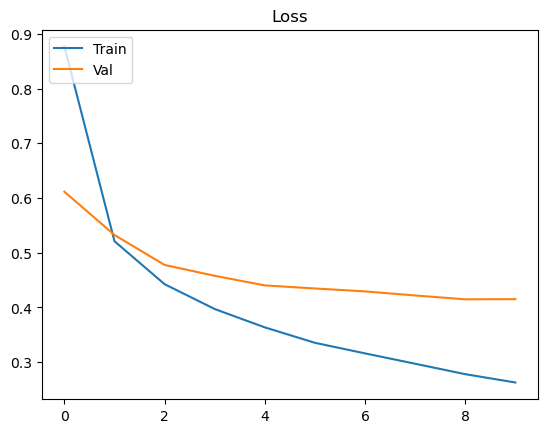

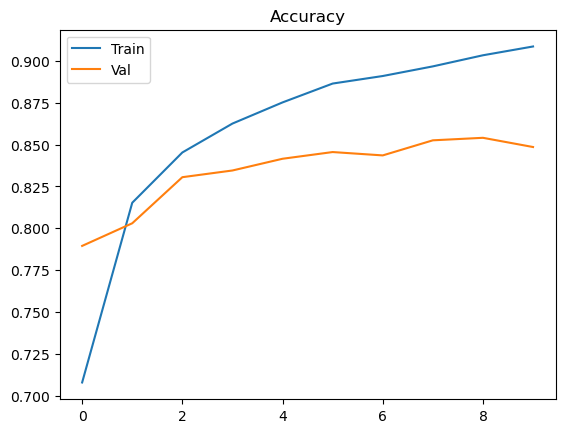

In [12]:
loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_accuracy"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

In [13]:
loss, acc = model.evaluate(images_test, targets_test)
print("Test Loss", loss)
print("Test Accuracy", acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.4579 - accuracy: 0.8359
Test Loss 0.4578579068183899
Test Accuracy 0.8359000086784363
